In [1]:
#Dependencies
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
import cufflinks as cf
import plotly 
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from collections import Counter
from sklearn import metrics
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold

In [2]:
# Allow plots to appear within the notebook
%matplotlib inline

In [3]:
# Import CSV as DataFrame
df = pd.read_csv("Youtube_Hot100_data2.csv")

In [4]:
# Drop all N/A values from the DataFrame
df.dropna()

,Song_artist,Song_duration_weeks,Song_isNew,Song_last_week,Song_peak,Song_rank,Song_title,categoryId,channelId,channelTitle,commentCount,dislikeCount,favoriteCount,likeCount,title,videoId,viewCount
0,Ariana Grande,6,False,1,1,1,"Thank U, Next",10.0,UC0VOyT2OCBKdQhF3BAbZ-1g,ArianaGrandeVevo,663016.0,357697.0,0.0,8120132.0,"Ariana Grande - thank u, next",gl1aHhXnN1k,2.317321e+08
1,Halsey,10,False,3,2,2,Without Me,10.0,UCm3FgJ2Hqm7tb70T-GfwXVA,HalseyVEVO,37929.0,25356.0,0.0,1157239.0,Halsey - Without Me,ZAfAud_M_mg,6.146429e+07
2,Travis Scott,19,False,2,1,3,Sicko Mode,10.0,UClRx3MMyYUyqOxyEqA5F2nQ,TravisScottVEVO,126968.0,103542.0,0.0,2102760.0,Travis Scott - SICKO MODE ft. Drake,6ONRf7h3Mdk,1.691826e+08
3,Marshmello & Bastille,17,False,4,3,4,Happier,10.0,UCEdvpU2pFRCVqU6yIPyTpMQ,Marshmello,213618.0,39980.0,0.0,2630802.0,Marshmello ft. Bastille - Happier (Official Mu...,m7Bc3pLyij0,1.279214e+08
4,Panic! At The Disco,19,False,5,5,5,High Hopes,10.0,UColJTBTSGqaaZr5NOk5r3Pg,Panic! At The Disco,81771.0,32808.0,0.0,1534225.0,Panic! At The Disco - High Hopes (Official Video),IPXIgEAGe4U,1.097872e+08
5,Mariah Carey,28,False,7,6,6,All I Want For Christmas Is You,10.0,UClS0wn3LPs9jdX_yt2g1k8w,MariahCareyVEVO,175093.0,113578.0,0.0,2257748.0,Mariah Carey - All I Want For Christmas Is You,yXQViqx6GMY,5.357143e+08
6,Post Malone & Swae Lee,8,False,17,7,7,Sunflower (Spider-Man: Into The Spider-Verse),10.0,UCOhtMAg7xh8wv_wUHMgFc-Q,PostMaloneVEVO,78683.0,44637.0,0.0,1977996.0,"Post Malone, Swae Lee - Sunflower (Spider-Man:...",ApXoWvfEYVU,1.632909e+08
7,Lil Baby & Gunna,13,False,9,4,8,Drip Too Hard,10.0,UC_z9AthnCGSAk_tZf-KqoFA,Lil Baby - Topic,8120.0,21545.0,0.0,314598.0,Drip Too Hard,sqyNqxbCfO8,3.578084e+07
8,Kodak Black Featuring Travis Scott & Offset,9,False,8,2,9,ZEZE,10.0,UChEYVadfkMCfrKUi6qr3I1Q,Kodak Black,91185.0,67280.0,0.0,1573876.0,Kodak Black - ZEZE (feat. Travis Scott & Offse...,mjaayCARwro,1.460804e+08
9,Maroon 5 Featuring Cardi B,29,False,11,1,10,Girls Like You,10.0,UCN1hnUccO4FD5WfM7ithXaw,Maroon5VEVO,457596.0,434539.0,0.0,11055211.0,Maroon 5 - Girls Like You ft. Cardi B,aJOTlE1K90k,1.583535e+09


In [5]:
# View columns in the DataFrame
df.columns

Index(['Song_artist', 'Song_duration_weeks', 'Song_isNew', 'Song_last_week',
       'Song_peak', 'Song_rank', 'Song_title', 'categoryId', 'channelId',
       'channelTitle', 'commentCount', 'dislikeCount', 'favoriteCount',
       'likeCount', 'title', 'videoId', 'viewCount'],
      dtype='object')

In [6]:
# Removes Scientific Notation from the DataFrame 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
#Creating a Pivot Table 
artist_df_pivot= pd.pivot_table(df, index=['Song_artist', 'Song_title'], values=['likeCount', 'Song_duration_weeks', 'Song_peak', 'Song_rank', 'commentCount', 'dislikeCount','viewCount'])

In [8]:
# Reset the Index to be on Song Artist and Song Title
youtube_df = artist_df_pivot.reset_index()

In [9]:
# Check DataFrame
youtube_df

,Song_artist,Song_title,Song_duration_weeks,Song_peak,Song_rank,commentCount,dislikeCount,likeCount,viewCount
0,2 Chainz Featuring YG & Offset,Proud,1.000,96.000,97.500,15845.000,19136.000,411532.000,39160903.000
1,"2 Chainz, Drake & Quavo",Bigger > You,1.000,53.000,56.500,6674.000,14156.000,276433.000,34836315.000
2,21 Savage,Bank Account,26.500,12.000,35.667,81850.000,74769.333,1490735.833,234235392.333
3,5 Seconds Of Summer,Want You Back,0.000,61.000,61.000,131421.000,62575.000,1473910.000,245582664.000
4,5 Seconds Of Summer,Youngblood,14.464,22.607,24.857,35588.000,20519.893,836680.571,58146027.607
5,6LACK Featuring J. Cole,Pretty Little Fears,0.000,76.000,76.000,13371.000,11651.000,438940.000,31244703.000
6,6ix9ine,Billy,4.375,51.625,62.500,124852.000,201882.000,1845433.625,245299811.000
7,6ix9ine,Gotti,0.000,99.000,99.000,233207.000,231282.000,2410258.000,296169167.000
8,6ix9ine,Gummo,13.000,12.000,27.667,220468.000,299827.600,2164272.533,324387362.333
9,6ix9ine,Kooda,6.000,50.000,72.857,118845.714,154177.286,1415322.571,208089932.857


In [10]:
youtube_df = youtube_df.fillna(0)

In [11]:
youtube_df.columns

Index(['Song_artist', 'Song_title', 'Song_duration_weeks', 'Song_peak',
       'Song_rank', 'commentCount', 'dislikeCount', 'likeCount', 'viewCount'],
      dtype='object')

In [12]:
youtube_df.dtypes

Song_artist             object
Song_title              object
Song_duration_weeks    float64
Song_peak              float64
Song_rank              float64
commentCount           float64
dislikeCount           float64
likeCount              float64
viewCount              float64
dtype: object

In [13]:
youtube_df["Song_duration_weeks"] = youtube_df.Song_duration_weeks.astype(int)
youtube_df["Song_peak"] = youtube_df.Song_peak.astype(int)
youtube_df["Song_rank"] = youtube_df.Song_rank.astype(int)
youtube_df["commentCount"] = youtube_df.commentCount.astype(int)
youtube_df["dislikeCount"] = youtube_df.dislikeCount.astype(int)
youtube_df["likeCount"] = youtube_df.likeCount.astype(int)
youtube_df["viewCount"] = youtube_df.viewCount.astype(int)

In [14]:
youtube_df

,Song_artist,Song_title,Song_duration_weeks,Song_peak,Song_rank,commentCount,dislikeCount,likeCount,viewCount
0,2 Chainz Featuring YG & Offset,Proud,1,96,97,15845,19136,411532,39160903
1,"2 Chainz, Drake & Quavo",Bigger > You,1,53,56,6674,14156,276433,34836315
2,21 Savage,Bank Account,26,12,35,81850,74769,1490735,234235392
3,5 Seconds Of Summer,Want You Back,0,61,61,131421,62575,1473910,245582664
4,5 Seconds Of Summer,Youngblood,14,22,24,35588,20519,836680,58146027
5,6LACK Featuring J. Cole,Pretty Little Fears,0,76,76,13371,11651,438940,31244703
6,6ix9ine,Billy,4,51,62,124852,201882,1845433,245299811
7,6ix9ine,Gotti,0,99,99,233207,231282,2410258,296169167
8,6ix9ine,Gummo,13,12,27,220468,299827,2164272,324387362
9,6ix9ine,Kooda,6,50,72,118845,154177,1415322,208089932


In [15]:
youtube_df.dtypes

Song_artist            object
Song_title             object
Song_duration_weeks     int32
Song_peak               int32
Song_rank               int32
commentCount            int32
dislikeCount            int32
likeCount               int32
viewCount               int32
dtype: object

In [18]:
youtube_df

,Song_artist,Song_title,Song_duration_weeks,Song_peak,Song_rank,commentCount,dislikeCount,likeCount,viewCount
0,2 Chainz Featuring YG & Offset,Proud,1,96,97,15845,19136,411532,39160903
1,"2 Chainz, Drake & Quavo",Bigger > You,1,53,56,6674,14156,276433,34836315
2,21 Savage,Bank Account,26,12,35,81850,74769,1490735,234235392
3,5 Seconds Of Summer,Want You Back,0,61,61,131421,62575,1473910,245582664
4,5 Seconds Of Summer,Youngblood,14,22,24,35588,20519,836680,58146027
5,6LACK Featuring J. Cole,Pretty Little Fears,0,76,76,13371,11651,438940,31244703
6,6ix9ine,Billy,4,51,62,124852,201882,1845433,245299811
7,6ix9ine,Gotti,0,99,99,233207,231282,2410258,296169167
8,6ix9ine,Gummo,13,12,27,220468,299827,2164272,324387362
9,6ix9ine,Kooda,6,50,72,118845,154177,1415322,208089932


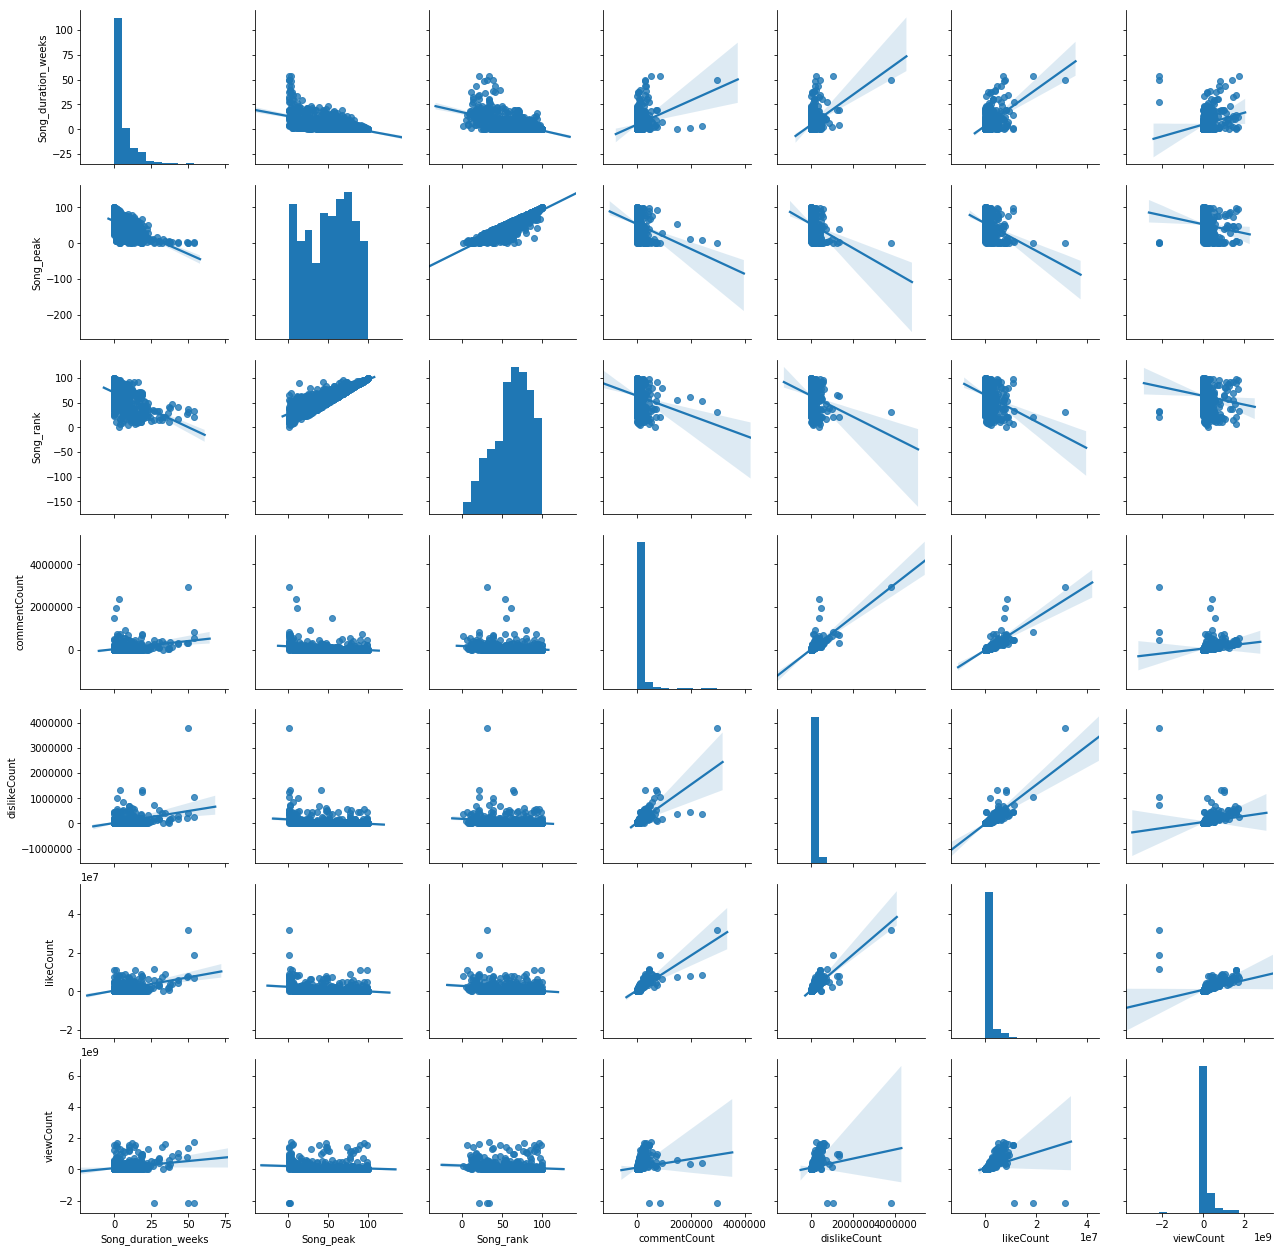

In [72]:
sns.pairplot(youtube_df, kind='reg')

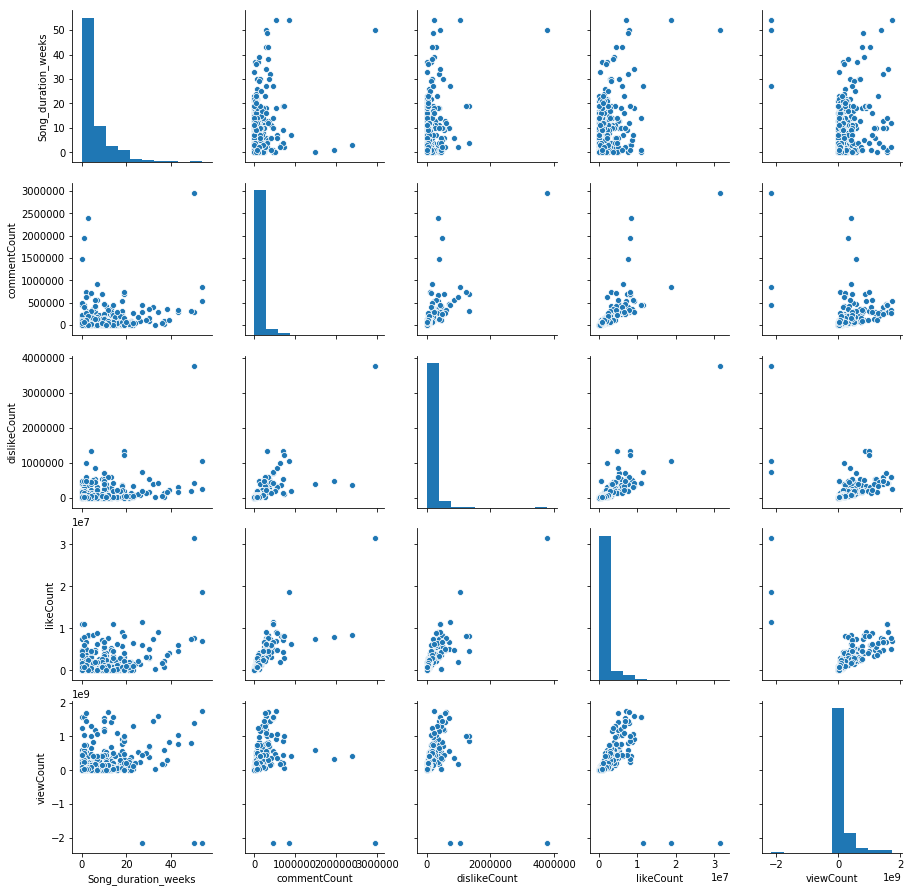

In [74]:
Y = youtube_df[["Song_duration_weeks","commentCount", "dislikeCount", "likeCount", "viewCount"]]
sns.pairplot(Y)

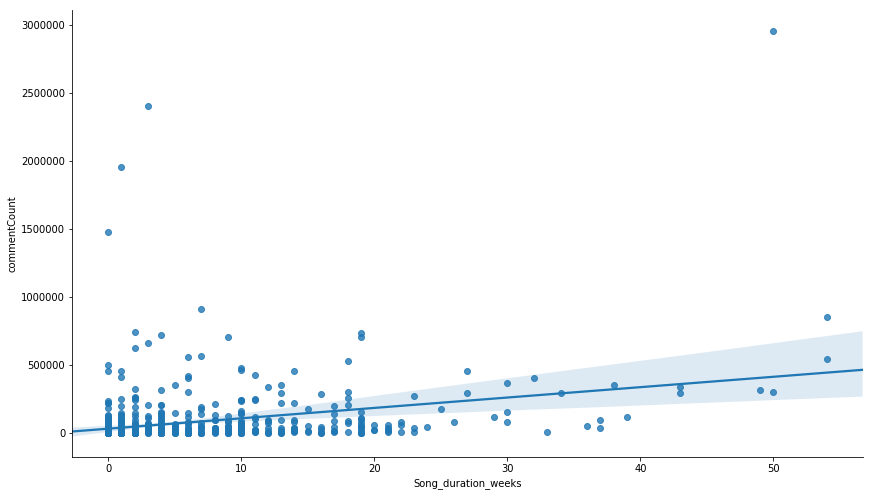

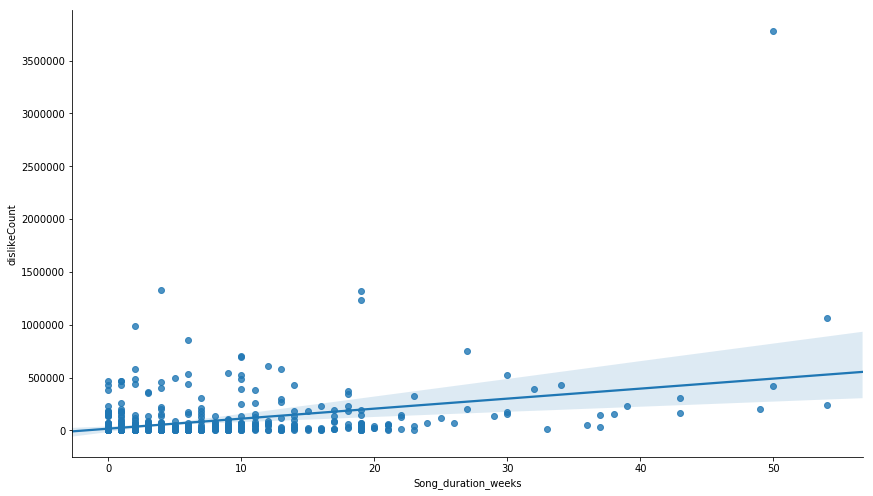

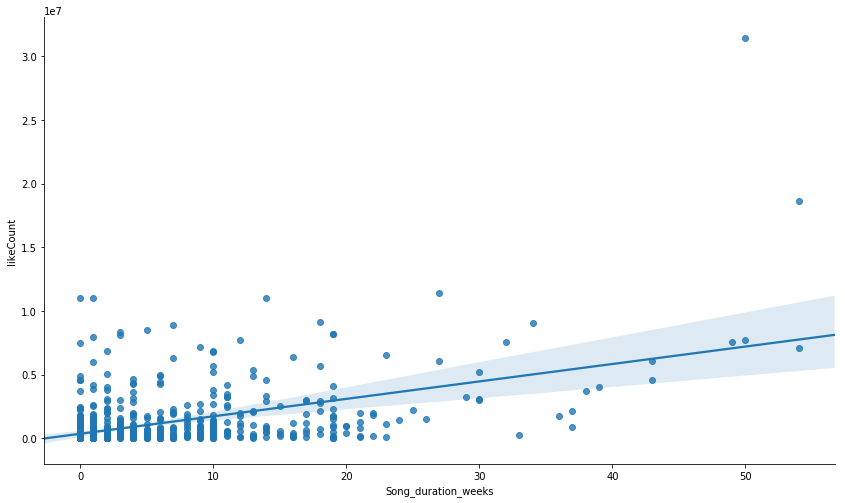

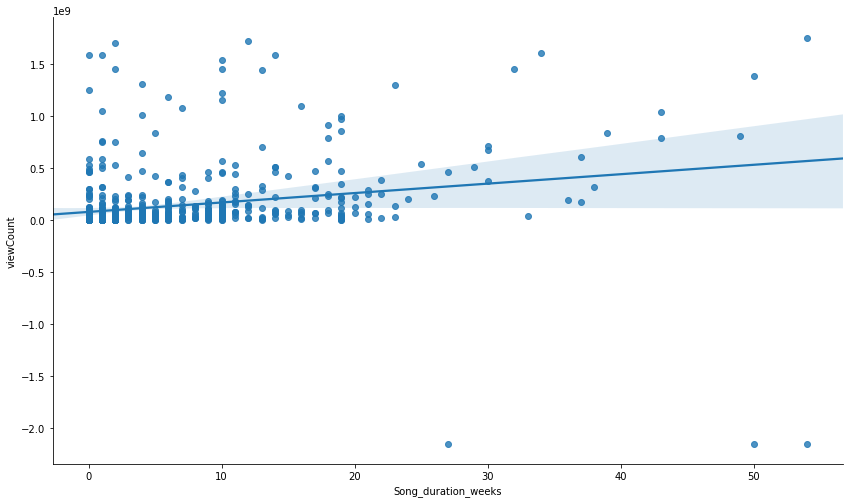

In [46]:
# Using Seaborn to visualize between the features and the response using scatterplots
sns.pairplot(youtube_df, x_vars="Song_duration_weeks", y_vars=["commentCount"], height=7, aspect=1.7, kind='reg')

sns.pairplot(youtube_df, x_vars="Song_duration_weeks", y_vars=["dislikeCount"], height=7, aspect=1.7, kind='reg')

sns.pairplot(youtube_df, x_vars="Song_duration_weeks", y_vars=["likeCount"], height=7, aspect=1.7, kind='reg')

sns.pairplot(youtube_df, x_vars="Song_duration_weeks", y_vars=["viewCount"], height=7, aspect=1.7, kind='reg')


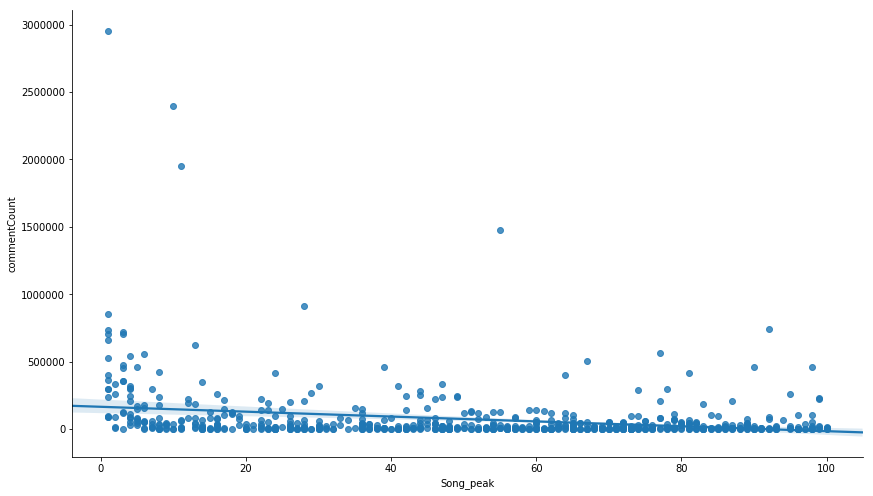

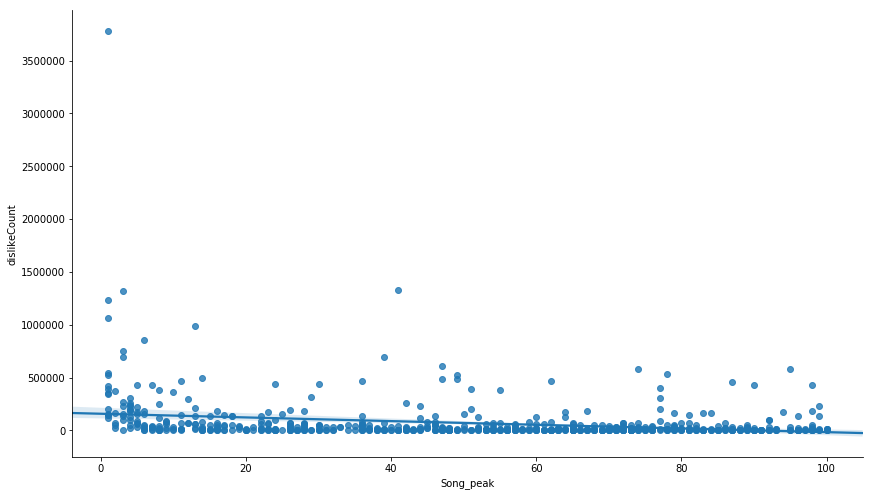

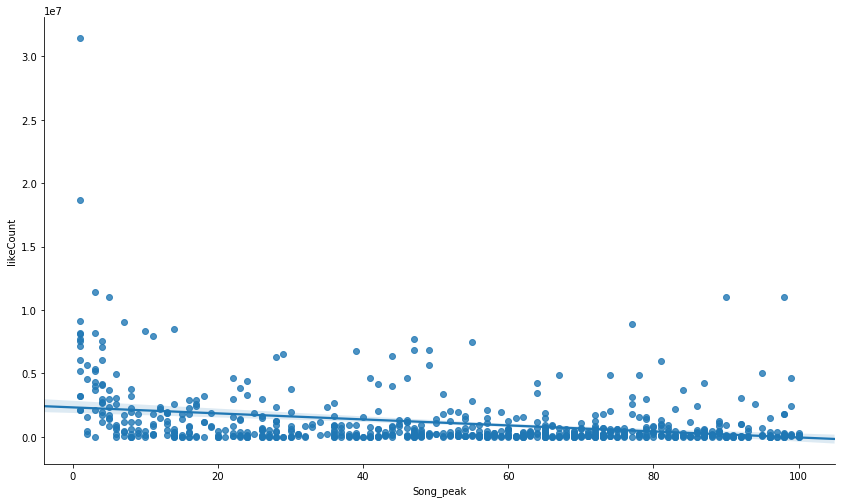

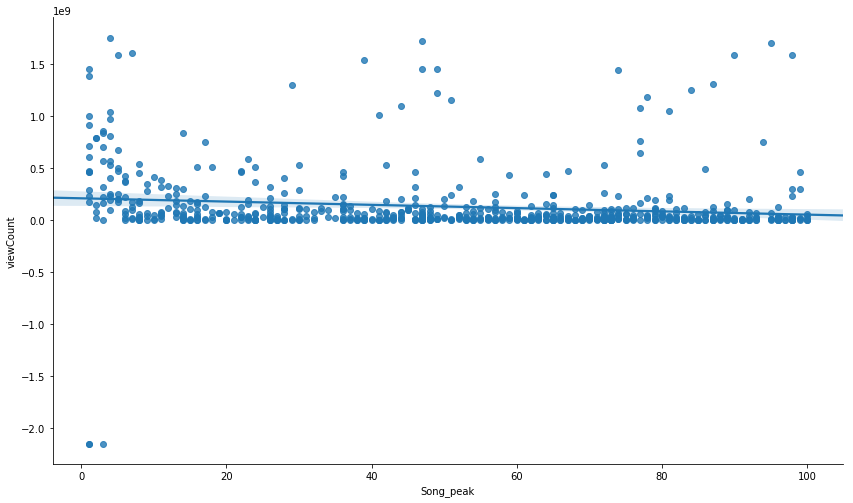

In [40]:
# Using Seaborn to visualize between the features and the response using scatterplots
sns.pairplot(youtube_df, x_vars="Song_peak", y_vars=["commentCount"], height=7, aspect=1.7, kind='reg')

sns.pairplot(youtube_df, x_vars="Song_peak", y_vars=["dislikeCount"], height=7, aspect=1.7, kind='reg')

sns.pairplot(youtube_df, x_vars="Song_peak", y_vars=["likeCount"], height=7, aspect=1.7, kind='reg')

sns.pairplot(youtube_df, x_vars="Song_peak", y_vars=["viewCount"], height=7, aspect=1.7, kind='reg')

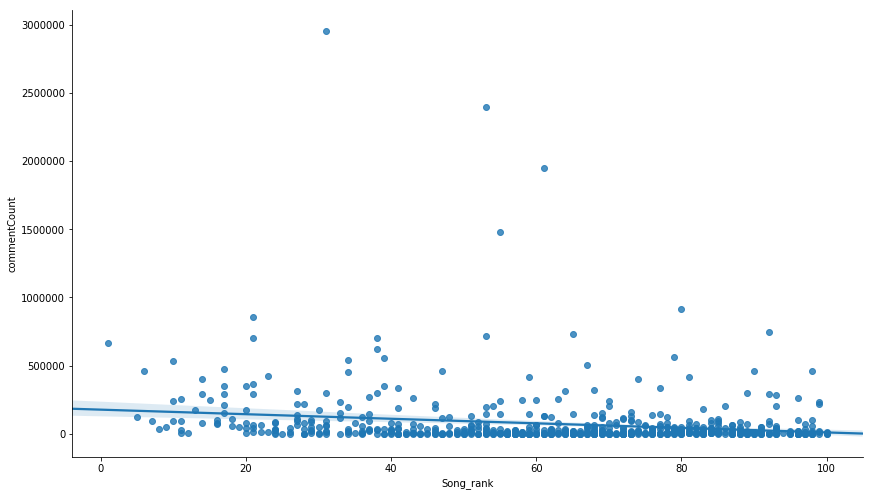

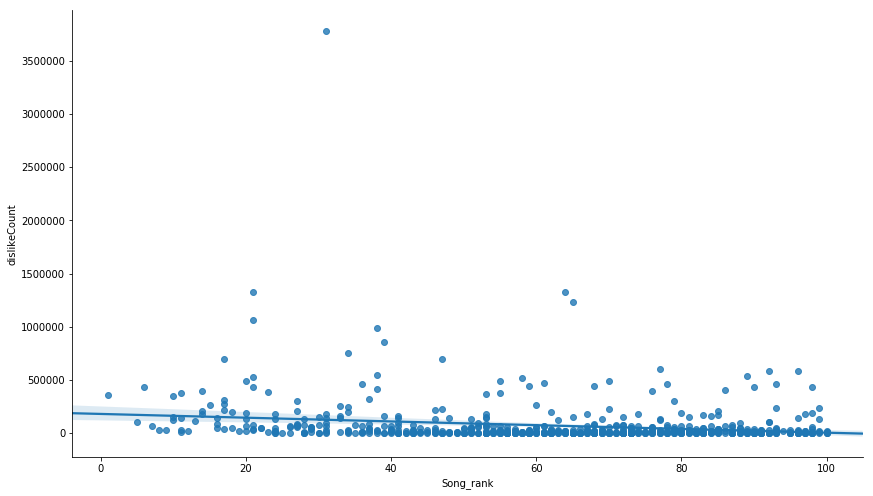

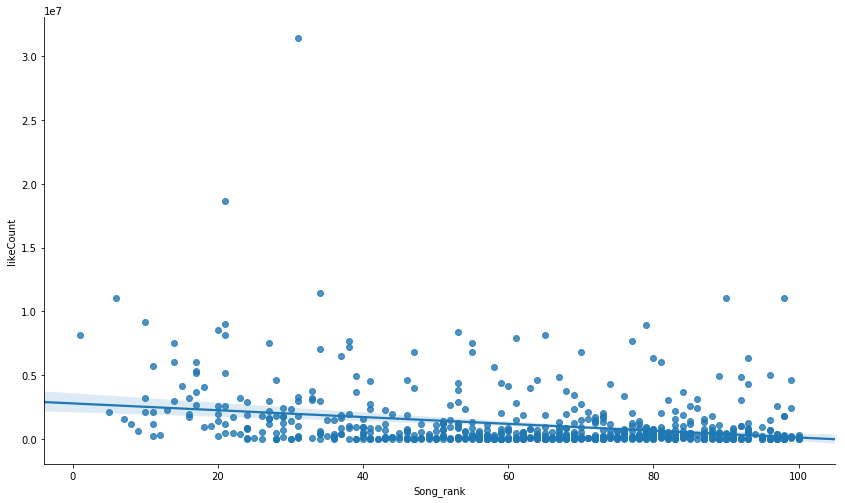

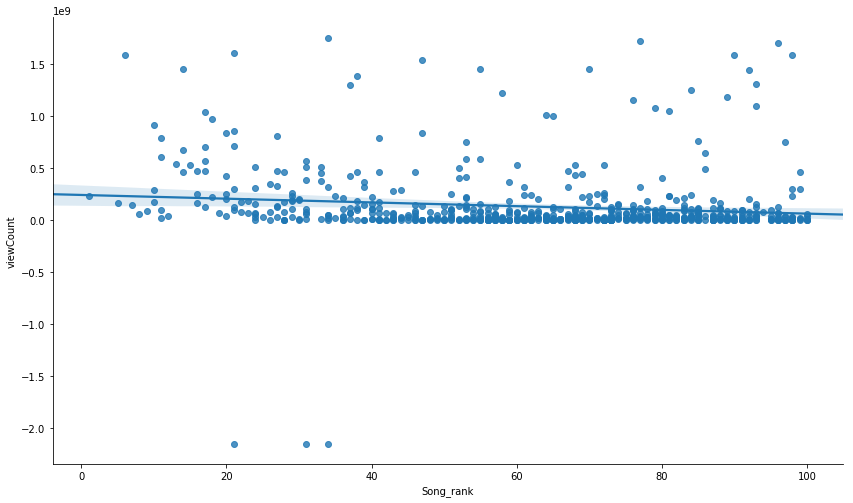

In [43]:
# Using Seaborn to visualize between the features and the response using scatterplots

sns.pairplot(youtube_df, x_vars="Song_rank", y_vars=["commentCount"], height=7, aspect=1.7, kind='reg')

sns.pairplot(youtube_df, x_vars="Song_rank", y_vars=["dislikeCount"], height=7, aspect=1.7, kind='reg')

sns.pairplot(youtube_df, x_vars="Song_rank", y_vars=["likeCount"], height=7, aspect=1.7, kind='reg')

sns.pairplot(youtube_df, x_vars="Song_rank", y_vars=["viewCount"], height=7, aspect=1.7, kind='reg')

In [ ]:
youtube_df

In [65]:
corr = youtube_df.corr()

In [63]:
#Correlations
print(youtube_df.corr(method='pearson'))

                     Song_duration_weeks  Song_peak  Song_rank  commentCount  \
Song_duration_weeks                1.000     -0.523     -0.510         0.305   
Song_peak                         -0.523      1.000      0.885        -0.251   
Song_rank                         -0.510      0.885      1.000        -0.184   
commentCount                       0.305     -0.251     -0.184         1.000   
dislikeCount                       0.380     -0.242     -0.194         0.767   
likeCount                          0.499     -0.300     -0.268         0.822   
viewCount                          0.231     -0.139     -0.126         0.177   

                     dislikeCount  likeCount  viewCount  
Song_duration_weeks         0.380      0.499      0.231  
Song_peak                  -0.242     -0.300     -0.139  
Song_rank                  -0.194     -0.268     -0.126  
commentCount                0.767      0.822      0.177  
dislikeCount                1.000      0.848      0.186  
likeCount  

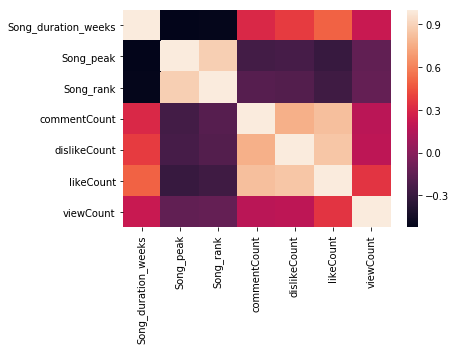

In [68]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [21]:
# Create a Python list of feature names
feature_cols = ["commentCount", "dislikeCount", "likeCount", "viewCount"]

# Use the list to select a subset of the original DataFrame
X = youtube_df[feature_cols]

# print first 5 rows
X.head()

,commentCount,dislikeCount,likeCount,viewCount
0,15845,19136,411532,39160903
1,6674,14156,276433,34836315
2,81850,74769,1490735,234235392
3,131421,62575,1473910,245582664
4,35588,20519,836680,58146027


In [22]:
#check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(694, 4)


In [23]:
# select a Series from the DataFrame
y = youtube_df["Song_duration_weeks"]

#print the first 5 rows
y.head()

0     1
1     1
2    26
3     0
4    14
Name: Song_duration_weeks, dtype: int32

In [24]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(694,)


## Splitting X and y into training and test sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [26]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(520, 4)
(520,)
(174, 4)
(174,)


## Linear Regression

In [27]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficient)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Interpreting model coefficients

In [28]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

3.2163574917519853
[-1.34774569e-05 -5.35241659e-06  3.35848496e-06  3.77138523e-10]


In [47]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

# How do we interpret our Comment Count (-0.0000135), Dislike Count (-0.00000535), Like Count (-0.00000336), and View Count (-0.000000000377) ?

For a given amount of dislikes, likes, or views, a "unit" increase in comments is associated with a a -0.0000135 unit decrease in the number of weeks on the Hot 100 charts